# Pair Trading: Everybody loves NVIDIA

I wanted to test the relationship between NVIDIA's stock price and the stock price of the companies that manufacture NVIDIA's chips. NVIDIA is a fabless company, so they rely heavily on companies like TSMC and SK Hynix.

### Data Analysis

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

**NVIDIA and SK Hynix Data**

In [2]:
# Get data for NVIDIA and SK Hynix
tickers = ['NVDA', 'HXSCL']
data1 = yf.download(tickers, start='2024-01-01', end='2025-01-01')['Close']
data1.head()

[*********************100%***********************]  2 of 2 completed


Ticker,HXSCL,NVDA
Date,,
2024-01-02,41.059792,48.154346
2024-01-03,41.059792,47.555515
2024-01-04,41.059792,47.984398
2024-01-05,41.059792,49.083080
2024-01-08,41.059792,52.238186


**NVIDIA and TSMC Data**

In [3]:
# Get data for NVIDIA and TSMC
tickers = ['NVDA', 'TSM']
data2 = yf.download(tickers, start='2024-01-01', end='2025-01-01')['Close']
data2.head()

[*********************100%***********************]  2 of 2 completed


Ticker,NVDA,TSM
Date,,
2024-01-02,48.154346,100.112770
2024-01-03,47.555515,98.771751
2024-01-04,47.984398,97.746262
2024-01-05,49.083080,98.219566
2024-01-08,52.238186,100.812851


**TSMC and SK Hynix Data**

In [4]:
# Get data for TSMC and SK Hynix
tickers = ['TSM', 'HXSCL']
data3 = yf.download(tickers, start='2024-01-01', end='2025-01-01')['Close']
data3.head()

[*********************100%***********************]  2 of 2 completed


Ticker,HXSCL,TSM
Date,,
2024-01-02,41.059792,100.112770
2024-01-03,41.059792,98.771751
2024-01-04,41.059792,97.746262
2024-01-05,41.059792,98.219566
2024-01-08,41.059792,100.812851


### Cointegration Tests

In [5]:
# Perform cointegration test for NVIDA and SK Hynix
score, p_value, _ = coint(data1['NVDA'], data1['HXSCL'])

print(f'Cointegration test p-value: {p_value}')

# If p-value is low (<0.1), the pairs are cointegrated
if p_value < 0.1:
    print("The pairs are cointegrated.")
else:
    print("The pairs are not cointegrated.")

Cointegration test p-value: 0.07141110653455036
The pairs are cointegrated.


In [6]:
# Perform cointegration test for NVIDIA and TSMC
score, p_value, _ = coint(data2['NVDA'], data2['TSM'])

print(f'Cointegration test p-value: {p_value}')

# If p-value is low (<0.1), the pairs are cointegrated
if p_value < 0.1:
    print("The pairs are cointegrated.")
else:
    print("The pairs are not cointegrated.")

Cointegration test p-value: 0.03799340760745956
The pairs are cointegrated.


In [7]:
# Perform cointegration test for TSMC and SK Hynix
score, p_value, _ = coint(data3['TSM'], data3['HXSCL'])

print(f'Cointegration test p-value: {p_value}')

# If p-value is low (<0.1), the pairs are cointegrated
if p_value < 0.1:
    print("The pairs are cointegrated.")
else:
    print("The pairs are not cointegrated.")

Cointegration test p-value: 0.01488996337067767
The pairs are cointegrated.


### Spread Calculations

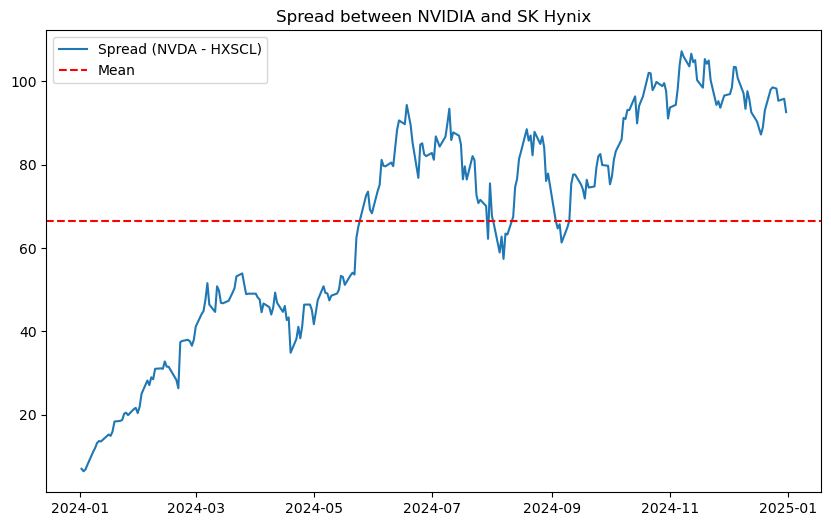

In [8]:
# Calculate the spread between NVIDIA and SK Hynix
data1['Spread'] = data1['NVDA'] - data1['HXSCL']

plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Spread'], label='Spread (NVDA - HXSCL)')
plt.axhline(data1['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Spread between NVIDIA and SK Hynix')
plt.show()

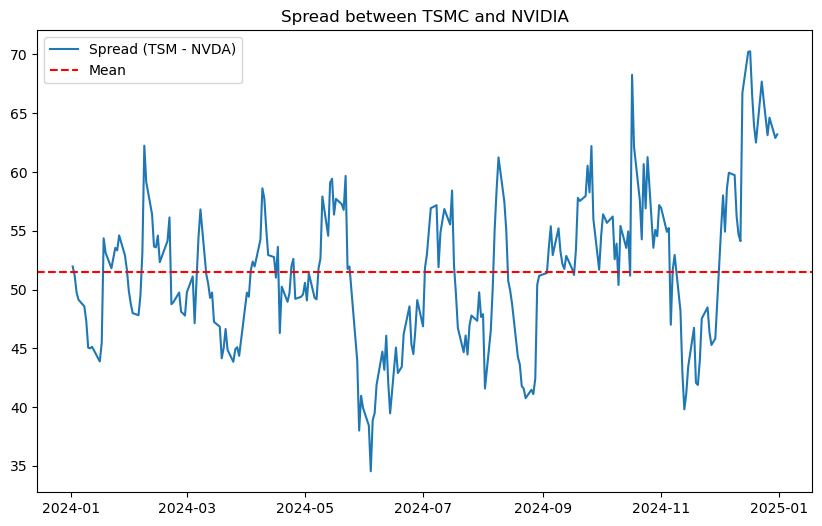

In [9]:
# Calculate the spread between TSMC and NVIDIA
data2['Spread'] = data2['TSM'] - data2['NVDA']

plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Spread'], label='Spread (TSM - NVDA)')
plt.axhline(data2['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Spread between TSMC and NVIDIA')
plt.show()

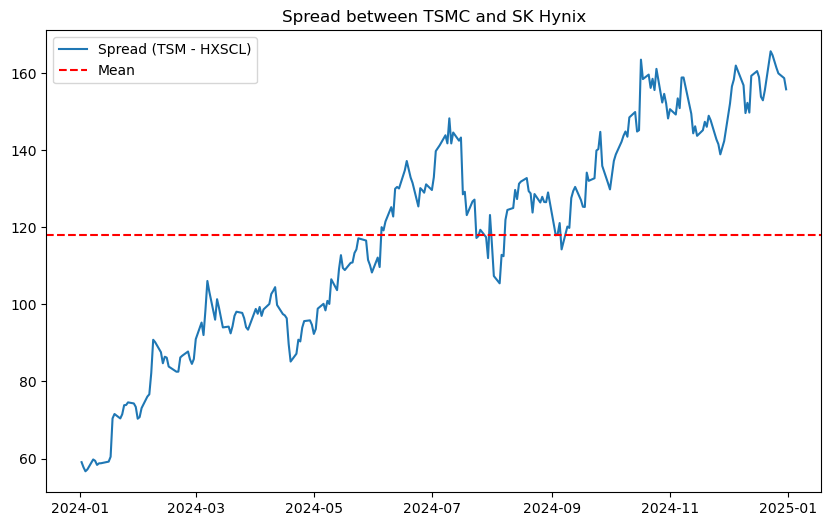

In [10]:
# Calculate the spread between SK Hynix and TSMC
data3['Spread'] = data3['TSM'] - data3['HXSCL']

plt.figure(figsize=(10, 6))
plt.plot(data3.index, data3['Spread'], label='Spread (TSM - HXSCL)')
plt.axhline(data3['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Spread between TSMC and SK Hynix')
plt.show()

### Threshold Calculations

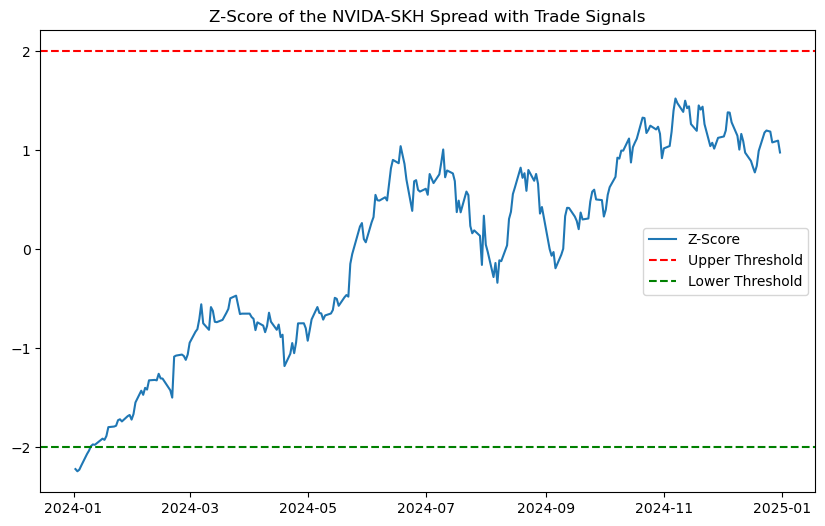

In [11]:
# Define z-score to normalize the spread
data1['Z-Score'] = (data1['Spread'] - data1['Spread'].mean()) / data1['Spread'].std()

# Set thresholds for entering and exiting trades
#upper_threshold = 2 * np.std(data['Spread'])
#lower_threshold = -2 * np.std(data['Spread'])
upper_threshold = 2
lower_threshold = -2

# Initialize signals
data1['Position'] = 0

# Generate signals for long and short positions
data1['Position'] = np.where(data1['Z-Score'] > upper_threshold, -1, data1['Position'])  # Short the spread
data1['Position'] = np.where(data1['Z-Score'] < lower_threshold, 1, data1['Position'])   # Long the spread
data1['Position'] = np.where((data1['Z-Score'] < 1) & (data1['Z-Score'] > -1), 0, data1['Position'])  # Exit

# Plot z-score and positions
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Z-Score'], label='Z-Score')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')
plt.legend()
plt.title('Z-Score of the NVIDA-SKH Spread with Trade Signals')
plt.show()

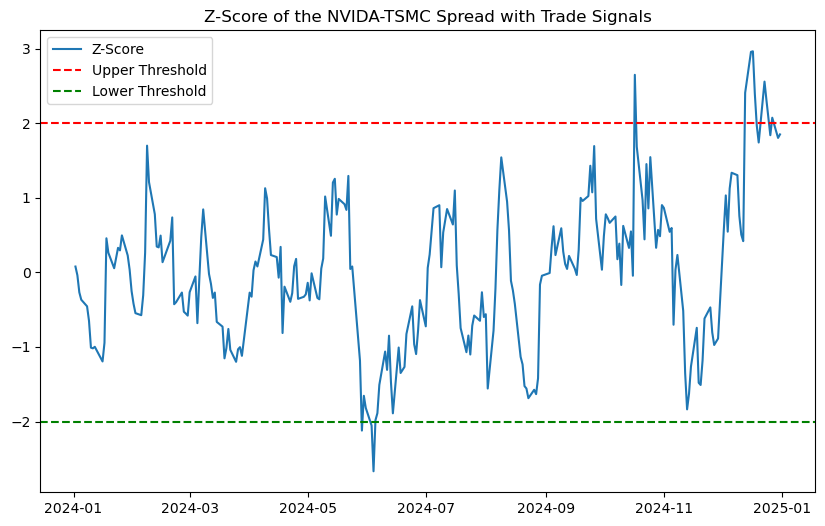

In [12]:
# Define z-score to normalize the spread
data2['Z-Score'] = (data2['Spread'] - data2['Spread'].mean()) / data2['Spread'].std()

# Set thresholds for entering and exiting trades
#upper_threshold = 2 * np.std(data['Spread'])
#lower_threshold = -2 * np.std(data['Spread'])
upper_threshold = 2
lower_threshold = -2

# Initialize signals
data2['Position'] = 0

# Generate signals for long and short positions
data2['Position'] = np.where(data2['Z-Score'] > upper_threshold, -1, data2['Position'])  # Short the spread
data2['Position'] = np.where(data2['Z-Score'] < lower_threshold, 1, data2['Position'])   # Long the spread
data2['Position'] = np.where((data2['Z-Score'] < 1) & (data2['Z-Score'] > -1), 0, data2['Position'])  # Exit

# Plot z-score and positions
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Z-Score'], label='Z-Score')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')
plt.legend()
plt.title('Z-Score of the NVIDA-TSMC Spread with Trade Signals')
plt.show()

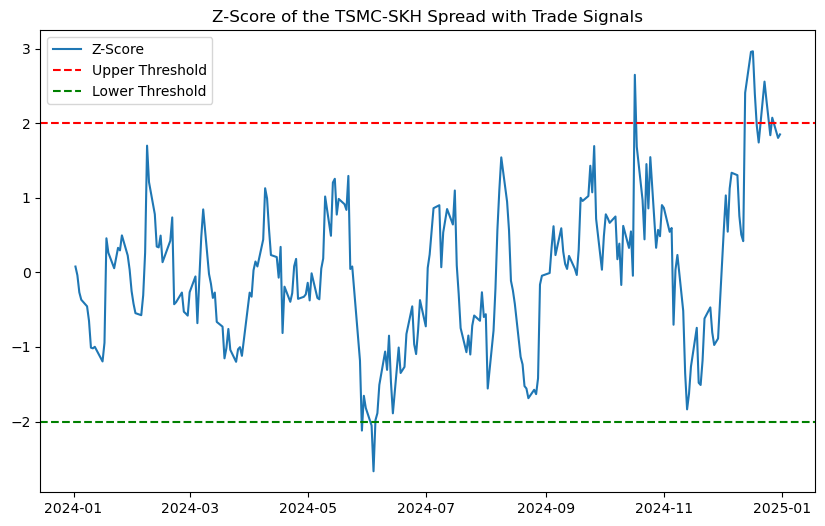

In [13]:
# Define z-score to normalize the spread
data3['Z-Score'] = (data3['Spread'] - data3['Spread'].mean()) / data3['Spread'].std()

# Set thresholds for entering and exiting trades
#upper_threshold = 2 * np.std(data['Spread'])
#lower_threshold = -2 * np.std(data['Spread'])
upper_threshold = 2
lower_threshold = -2

# Initialize signals
data3['Position'] = 0

# Generate signals for long and short positions
data3['Position'] = np.where(data3['Z-Score'] > upper_threshold, -1, data3['Position'])  # Short the spread
data3['Position'] = np.where(data3['Z-Score'] < lower_threshold, 1, data3['Position'])   # Long the spread
data3['Position'] = np.where((data3['Z-Score'] < 1) & (data3['Z-Score'] > -1), 0, data3['Position'])  # Exit

# Plot z-score and positions
plt.figure(figsize=(10, 6))
plt.plot(data3.index, data2['Z-Score'], label='Z-Score')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower Threshold')
plt.legend()
plt.title('Z-Score of the TSMC-SKH Spread with Trade Signals')
plt.show()

### Backtesting

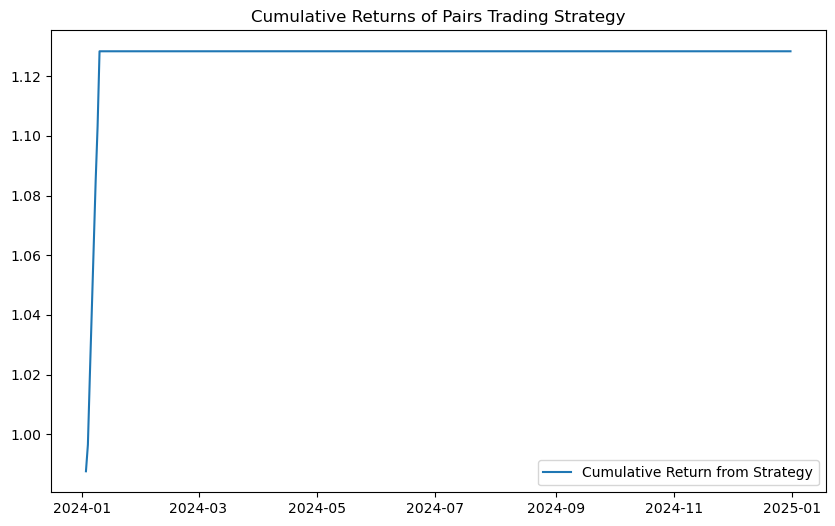

In [14]:
# Calculate daily returns
data1['NVDA_Return'] = data1['NVDA'].pct_change()
data1['HXSCL_Return'] = data1['HXSCL'].pct_change()

# Strategy returns: long spread means buying PEP and shorting KO
data1['Strategy_Return'] = data1['Position'].shift(1) * (data1['NVDA_Return'] - data1['HXSCL_Return'])

# Cumulative returns
data1['Cumulative_Return'] = (1 + data1['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Cumulative_Return'], label='Cumulative Return from Strategy')
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.legend()
plt.show()

In [15]:
# Calculate Sharpe Ratio
sharpe_ratio = data1['Strategy_Return'].mean() / data1['Strategy_Return'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio}')

# Calculate max drawdown
cumulative_max = data1['Cumulative_Return'].cummax()
drawdown = (cumulative_max - data1['Cumulative_Return']) / cumulative_max
max_drawdown = drawdown.max()
print(f'Max Drawdown: {max_drawdown}')

Sharpe Ratio: 1.6448104526881429
Max Drawdown: 0.0


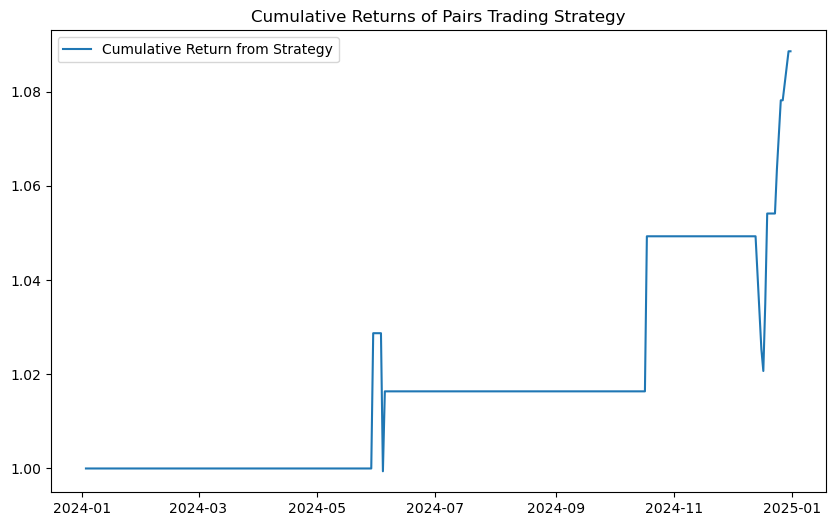

In [16]:
# Calculate daily returns
data2['NVDA_Return'] = data2['NVDA'].pct_change()
data2['TSM_Return'] = data2['TSM'].pct_change()

# Strategy returns: long spread means buying PEP and shorting KO
data2['Strategy_Return'] = data2['Position'].shift(1) * (data2['TSM_Return'] - data2['NVDA_Return'])

# Cumulative returns
data2['Cumulative_Return'] = (1 + data2['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Cumulative_Return'], label='Cumulative Return from Strategy')
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.legend()
plt.show()

In [17]:
# Calculate Sharpe Ratio
sharpe_ratio = data2['Strategy_Return'].mean() / data2['Strategy_Return'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio}')

# Calculate max drawdown
cumulative_max = data2['Cumulative_Return'].cummax()
drawdown = (cumulative_max - data2['Cumulative_Return']) / cumulative_max
max_drawdown = drawdown.max()
print(f'Max Drawdown: {max_drawdown}')

Sharpe Ratio: 1.3144472753110816
Max Drawdown: 0.028500784542204043


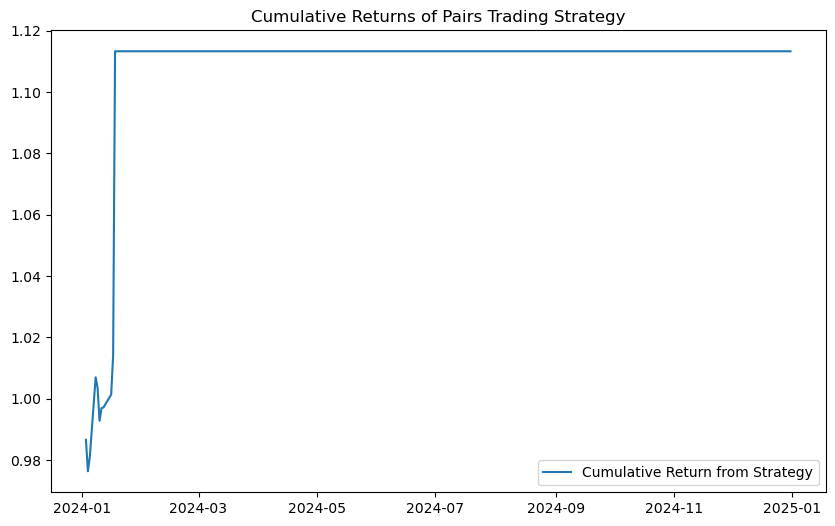

In [18]:
# Calculate daily returns
data3['HXSCL_Return'] = data3['HXSCL'].pct_change()
data3['TSM_Return'] = data3['TSM'].pct_change()

# Strategy returns: long spread means buying PEP and shorting KO
data3['Strategy_Return'] = data3['Position'].shift(1) * (data3['TSM_Return'] - data3['HXSCL_Return'])

# Cumulative returns
data3['Cumulative_Return'] = (1 + data3['Strategy_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(data3.index, data3['Cumulative_Return'], label='Cumulative Return from Strategy')
plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.legend()
plt.show()

In [19]:
# Calculate Sharpe Ratio
sharpe_ratio = data3['Strategy_Return'].mean() / data3['Strategy_Return'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio}')

# Calculate max drawdown
cumulative_max = data3['Cumulative_Return'].cummax()
drawdown = (cumulative_max - data3['Cumulative_Return']) / cumulative_max
max_drawdown = drawdown.max()
print(f'Max Drawdown: {max_drawdown}')

Sharpe Ratio: 1.0789321157697411
Max Drawdown: 0.014084428165768567
